In [1]:
# Exploring Handwritten Digits
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
import seaborn as sns 

In [2]:
# Loading and Visualizing the Digits Data 
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape 


(1797, 8, 8)

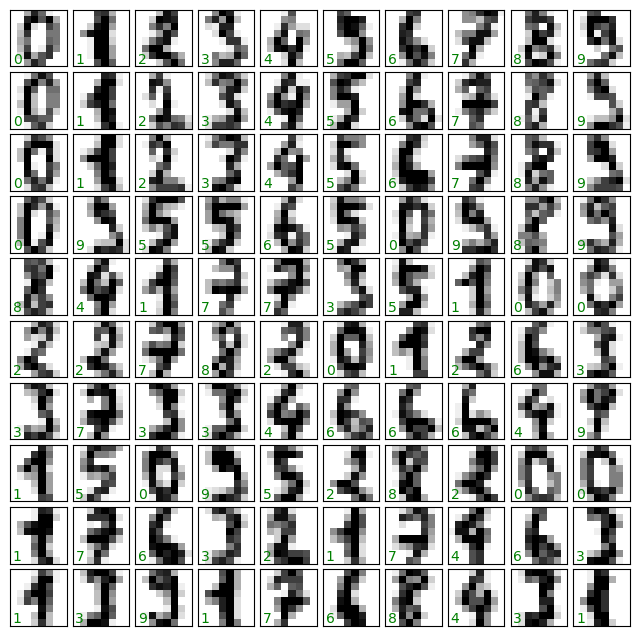

In [3]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(
    10, 10, 
    figsize=(8,8),
    subplot_kw={
        "xticks":[], "yticks":[]
    }, 
    gridspec_kw=dict(hspace=0.1, wspace=0.1)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(digits.target[i]), 
            transform=ax.transAxes, color="green")


In [8]:
# для того чтобы работать с scikit-learn нам нужно представление в виде 
# [n_samples, n_features] 
# мы будем представлять каждый пиксель картинки как фичу 
# image1: pixel1 pixel2 и так далее 
# и нам также потребуется target массив в котором мы будем раздавать метки для 
# каждой из цифер 

# итого у нас как видим выходит 1797 семплов и 64 фичи 

In [6]:
X = digits.data 
X.shape 

(1797, 64)

In [7]:
y = digits.target 
y.shape 

(1797,)

In [10]:
# Dimensionality Reduction 

from sklearn.manifold import Isomap 
iso = Isomap(n_components=2)        # сокращение до двух разрешений
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

/home/x057/anaconda31/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/x057/anaconda31/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


/tmp/ipykernel_524029/3686654249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("viridis",10)


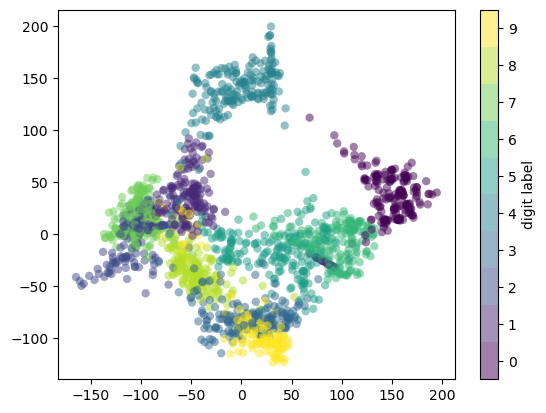

In [13]:
plt.scatter(
    data_projected[:,0],  # x - из первого скомканного разрешения 
    data_projected[:,1],  # y - из второго скомканного разрешения 
    c = digits.target, 
    edgecolors="none", alpha=0.5, 
    cmap=plt.cm.get_cmap("viridis",10)
)
plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5) # показывать 10 цифр (распределений)

In [15]:
# Classification on Digits 
# основная идея как видмм одинаковая - 
# сет данных делиться на две части - одна для учебы - другая для тестов 
# чтобы не ловить овер фиттинг 

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [17]:
# смотрим теперь качество попаданий
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(113.9222222222222, 0.5, 'true value')

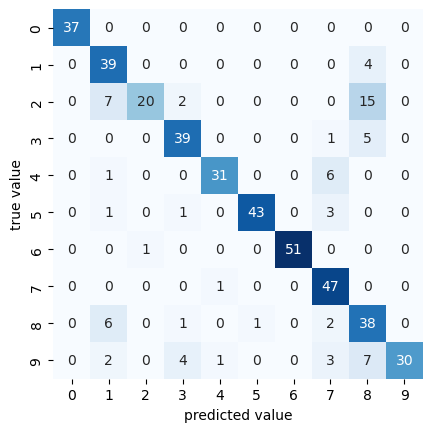

In [18]:
# конфжн матрица нам нужна для того чтобы посмотреть 
# на каких значения мы тестовые угадывания не получаем корректно 
# то есть сведя все к размерности 2D мы можем посмотерть буквально 
# где у нас ползет предсказывание (в этих местах потребуется дополнительная работа,
# может быть дополнительная классификация)

# читать матрицу как видим очень просто - все что праильно предсказывается 
# по диагонали - все цифры которые сбоков - это все ошибки - и понятно 
# что с чем путается 

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="Blues")
plt.xlabel("predicted value")
plt.ylabel("true value")

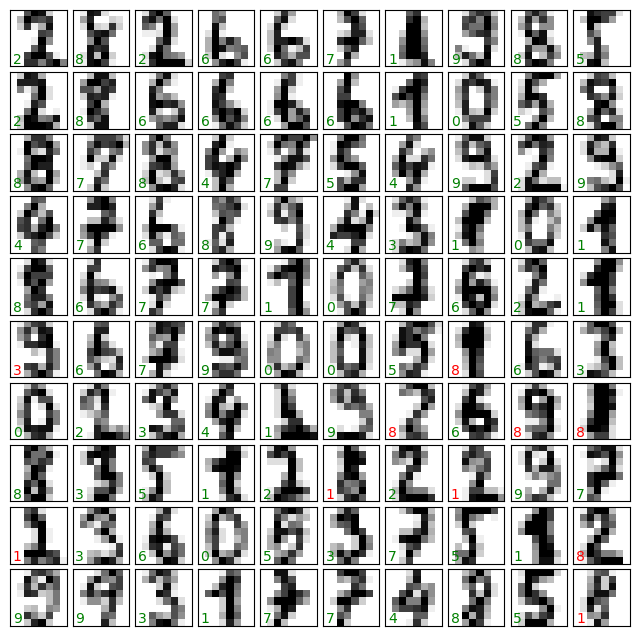

In [20]:
# можно также не confusion matrix выводить, а прямо данные 
# чтобы посмотреть где предсказание поползло 

fig, axes = plt.subplots(10,10, figsize=(8,8), 
                         subplot_kw={"xticks":[], "yticks":[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = Xtest.reshape(-1,8,8)

for i,ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(y_model[i]), 
            transform=ax.transAxes, 
            # внимание на условие инлайн 
            color="green" if (ytest[i] == y_model[i]) else "red")